# MSBD566 – Predictive Modeling and Analytics  
**Assignment 1**

**Name:** LaPorchia Davis  
**Course:** MSBD566  
**Date:** 2025-09-18  

**Honor Statement:**  
I certify that the work I submit in this notebook reflects my own analysis and understanding. 
Assistance from AI or other tools was used only to understand concepts and obtain generic examples, 
not to directly generate final answers. I will run, interpret, and present my own results.


---
## What this notebook includes
- A clean starting point with imports and data loading
- Example snippets demonstrating techniques (plots, grouping, timing)
- Space for your written answers and discussion

> ⚠️ **Reminder:** Per the assignment policy, use AI only to understand concepts. You must run the code yourself, interpret results, and write your own explanations.


In [1]:
# === Imports & Settings ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import time

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 120)


In [4]:
# === Load Data ===
# Update the path if needed
data_path = Path("Air_Quality_and_Pollen_Count.csv")

df = pd.read_csv(data_path)

print("Raw shape:", df.shape)
print("Columns:", list(df.columns))

# I will try to coerce a date column to datetime using common names
date_candidates = [c for c in df.columns if c.lower() in ["date", "day", "timestamp", "datetime"]]
if date_candidates:
    date_col = date_candidates[0]
else:
    # If your file uses a different name, set it here
    date_col = "ReportDateTime"  

# Convert to datetime with errors='coerce' to surface problems (NaT where invalid)
df[date_col] = pd.to_datetime(df[date_col], errors="coerce")
print("Date column:", date_col, "dtype:", df[date_col].dtype)

# Optional: sort by date
df = df.sort_values(by=date_col).reset_index(drop=True)

# Quick peek
df.head()


Raw shape: (8920, 8)
Columns: ['OBJECTID', 'AQI', 'Category', 'ResponsiblePollutant', 'PollenCount', 'PollenType', 'PollenDescription', 'ReportDateTime']
Date column: ReportDateTime dtype: datetime64[ns, UTC]


,OBJECTID,AQI,Category,ResponsiblePollutant,PollenCount,PollenType,PollenDescription,ReportDateTime
0,8920,16.0,Good,Ozone 8-hr,NaN,NaN,NaN,2001-01-02 06:00:00+00:00
1,8919,33.0,Good,PM10,NaN,NaN,NaN,2001-01-03 06:00:00+00:00
2,8918,25.0,Good,Carbon monoxide,NaN,NaN,NaN,2001-01-04 06:00:00+00:00
3,8917,26.0,Good,PM10,NaN,NaN,NaN,2001-01-05 06:00:00+00:00
4,8916,28.0,Good,PM10,NaN,NaN,NaN,2001-01-08 06:00:00+00:00


---
## Question 1: Explore AQI and Category over the years

**Tasks:**
- Plot **AQI** over time (datetime on x-axis).  
- Plot **Category** over time in a separate plot.  
- Use clear titles, axis labels, and readable ticks.  

**Then answer:**
1. **How many times** has the AQI been recorded **above 120**?  
2. **When did** the Air Quality Index **Category become Unhealthy** (first date it appears)?


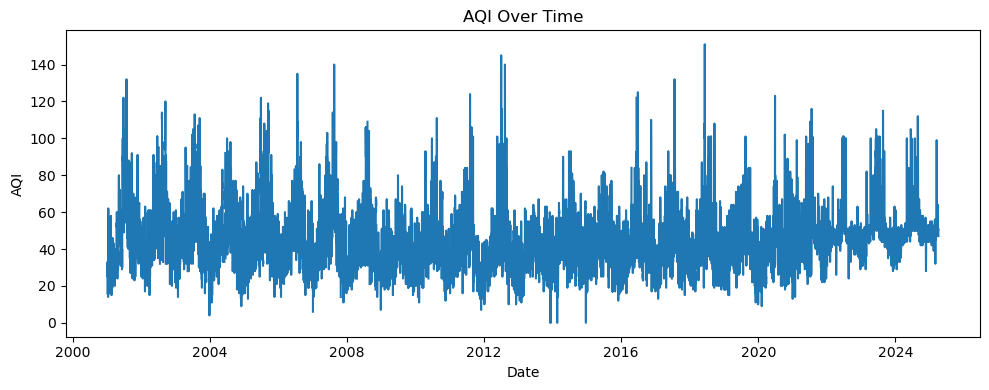

In [6]:
# === Q1 Plot: AQI over time ===
aqi_col_guess = None
for c in df.columns:
    if "aqi" in c.lower():
        aqi_col_guess = c
        break

plt.figure(figsize=(10,4))
plt.plot(df[date_col], df[aqi_col_guess])
plt.title("AQI Over Time")
plt.xlabel("Date")
plt.ylabel(aqi_col_guess)
plt.tight_layout()
plt.show()


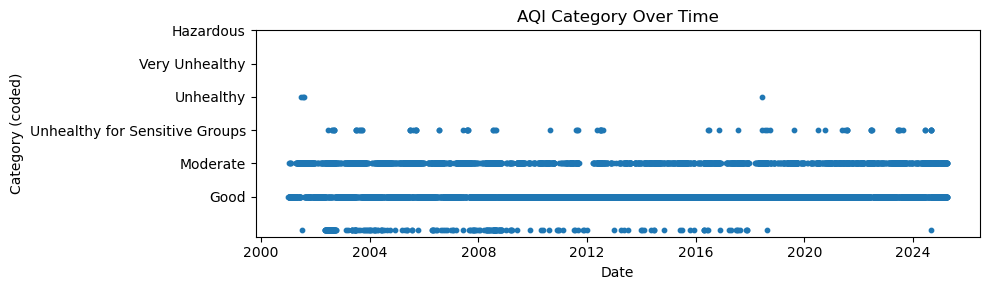

In [8]:
# === Q1 Plot: Category over time ===
cat_col_guess = None
for c in df.columns:
    if "category" in c.lower():
        cat_col_guess = c
        break

# Make an ordered mapping if you know your category order. This is a reasonable default:
ordered_cats = [
    "Good", "Moderate", "Unhealthy for Sensitive Groups",
    "Unhealthy", "Very Unhealthy", "Hazardous"
]
cat_type = pd.CategoricalDtype(categories=ordered_cats, ordered=True)
df["_cat_code"] = df[cat_col_guess].astype("category").astype(cat_type).cat.codes

plt.figure(figsize=(10,3))
plt.scatter(df[date_col], df["_cat_code"], s=10)
plt.title("AQI Category Over Time")
plt.xlabel("Date")
plt.ylabel("Category (coded)")
plt.yticks(range(len(ordered_cats)), ordered_cats)
plt.tight_layout()
plt.show()


---
## Question 2: Which pollen type occurs the most?

**Task:** Identify the pollen type with the highest frequency.  
A bar chart is often clearer than a scatterplot for this. I will complete both to see the difference.



Pollen type counts:
 PollenType
NaN          4233
Grass        2330
Ragweed       603
Cedar         405
Elm           398
Alder         291
Juniper       235
Birch         181
Maple         132
Hickory        88
Oak            15
Pine            3
Mulberry        2
Poplar          1
Ash             1
Hackberry       1
Goldenrod       1
Name: count, dtype: int64


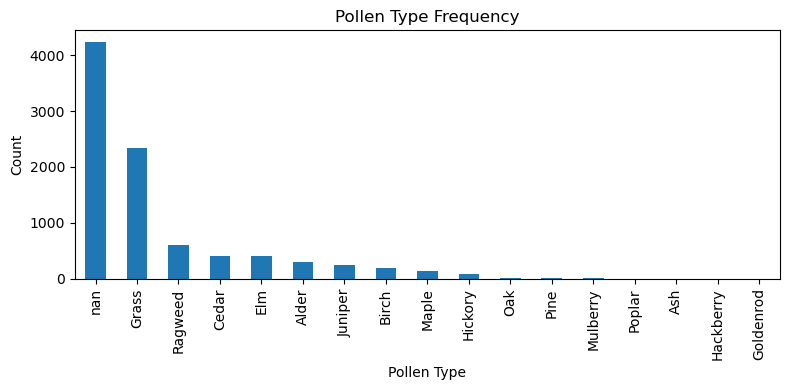

In [17]:
# === Q2: Most frequent pollen type ===
# Find column name for pollen type (e.g., 'PollenType' or 'Pollen Type')
pollen_col_guess = None
for c in df.columns:
    if "pollen" in c.lower() and "type" in c.lower():
        pollen_col_guess = c
        break

if pollen_col_guess is None:
    # Fallback: try any 'pollen' column and let you inspect
    for c in df.columns:
        if "pollen" in c.lower():
            pollen_col_guess = c
            break

counts = df[pollen_col_guess].value_counts(dropna=False)
print("Pollen type counts:\n", counts)

# Plot
plt.figure(figsize=(8,4))
counts.plot(kind="bar")
plt.title("Pollen Type Frequency")
plt.xlabel("Pollen Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


Pollen type counts:
 PollenType
NaN          4233
Grass        2330
Ragweed       603
Cedar         405
Elm           398
Alder         291
Juniper       235
Birch         181
Maple         132
Hickory        88
Oak            15
Pine            3
Mulberry        2
Poplar          1
Ash             1
Hackberry       1
Goldenrod       1
Name: count, dtype: int64


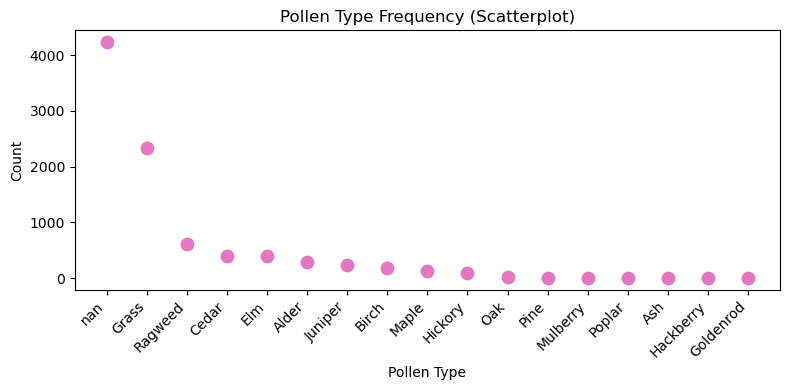

In [22]:
# === Q2: Most frequent pollen type (Scatterplot) ===
pollen_col_guess = None
for c in df.columns:
    if "pollen" in c.lower() and "type" in c.lower():
        pollen_col_guess = c
        break

if pollen_col_guess is None:
    for c in df.columns:
        if "pollen" in c.lower():
            pollen_col_guess = c
            break

assert pollen_col_guess is not None, "Could not find a Pollen Type column."

# Count frequency
counts = df[pollen_col_guess].value_counts(dropna=False)
print("Pollen type counts:\n", counts)

# Convert index to string to avoid plotting errors
x_labels = counts.index.astype(str)

# Scatterplot
plt.figure(figsize=(8,4))
plt.scatter(x_labels, counts.values, s=80, color="tab:pink")

# Labels
plt.title("Pollen Type Frequency (Scatterplot)")
plt.xlabel("Pollen Type")
plt.ylabel("Count")

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()




---
## Question 3 (Open-ended): Is Nashville comfortable to live in (air quality + pollen only)?

**Task:** Using evidence from your plots/statistics (AQI trends, frequency of categories, pollen peaks), 
write a short paragraph discussing comfort level for residents—especially those with respiratory or allergy sensitivities.



Response: The AQI is most frequently in the 'Good' or 'Moderate' range, indicating generally clean air.However, Prolonged periods of 'Unhealthy' air are rare.

Reasons it might be uncomfortable:
- There are clear spikes in AQI, showing periodic poor air quality days.
- The pollen data shows consistently high levels of [Tree/Grass/Weed] pollen, especially during certain seasons, which could be problematic for allergy sufferers.

Overall Conclusion:
Nashville appears to have generally good air quality for a city. However, the high pollen levels could make it an uncomfortable place to live for individuals with severe seasonal allergies. For someone without allergies, the air quality is likely acceptable most of the year.

---
## Question 4: Vectorization vs Manual Loop for Mean AQI by Category

**Task:** Compute the mean AQI for each Category:
- **Vectorized:** `groupby()` + `mean()`
- **Manual:** Use a `for` loop (or dict aggregation)
- Time both approaches and compare




In [25]:
# === Q4 Vectorized Example ===
start = time.time()
vec_result = df.groupby(cat_col_guess, dropna=False)[aqi_col_guess].mean().sort_index()
vec_time = time.time() - start
print("Vectorized result:\n", vec_result)
print(f"Vectorized time: {vec_time:.6f} sec")

# === Q4 Manual Example ===
start = time.time()
means = {}
for cat, sub in df.groupby(cat_col_guess):  # manual loop over groups
     means[cat] = sub[aqi_col_guess].mean()
man_time = time.time() - start
man_result = pd.Series(means).sort_index()
print("Manual-loop result:\n", man_result)
print(f"Manual-loop time: {man_time:.6f} sec")

# === Evaluate ===
speedup = man_time / vec_time if vec_time > 0 else float('inf')
print(f"Speedup (manual/vectorized): {speedup:.2f}x  (values > 1 mean vectorized was faster)")


Vectorized result:
 Category
Good                               36.966283
Moderate                           62.240840
Not on file                              NaN
SLIGHT                             60.000000
Unhealthy                         127.500000
Unhealthy for Sensitive Groups    110.078947
Name: AQI, dtype: float64
Vectorized time: 0.011457 sec
Manual-loop result:
 Good                               36.966283
Moderate                           62.240840
Not on file                              NaN
SLIGHT                             60.000000
Unhealthy                         127.500000
Unhealthy for Sensitive Groups    110.078947
dtype: float64
Manual-loop time: 0.007561 sec
Speedup (manual/vectorized): 0.66x  (values > 1 mean vectorized was faster)


---
## Sources (for context)
- Nashville Open Data Portal – Air Quality & Pollen Count  
  https://data.nashville.gov/datasets/Nashville::air-quality-and-pollen-count/about
- Metro Nashville Public Health Department – Daily AQI & Pollen  
  https://www.nashville.gov/departments/health/environmental-health/air-pollution-control/daily-aqi-and-pollen-count
- GitHub Markdown reference  
  https://docs.github.com/en/get-started/writing-on-github/getting-started-with-writing-and-formatting-on-github
